# Detección de características

Dado que las esquinas son características interesantes de una imagen. Los algoritmos de detección de características comenzaron con la detección de esquinas. Hay varias técnicas en OpenCV para detectar características.

*  Detección de esquinas Haris
*  Detección de esquinas Shi-Tomasi
*  SIFT (Transformación de características de escala invariable)
*  SURF (Funciones robustas aceleradas)
*  Algoritmo FAST para la detección de esquinas
*  ORB (Breve orientado FAST y girado)



SIFT, SURF están patentados y no están disponibles gratuitamente para uso comercial. Requiere opencv-contrib instalado para poder usarlos

Necesitamos reinstalar el paquete de Contributive de Python, para poder ejecutar los detectores SIRF y SURF pues estos son patentados


In [ ]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 158kB/s 
     |████████████████████████████████| 14.5MB 160kB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:


## Detección de esquinas Haris

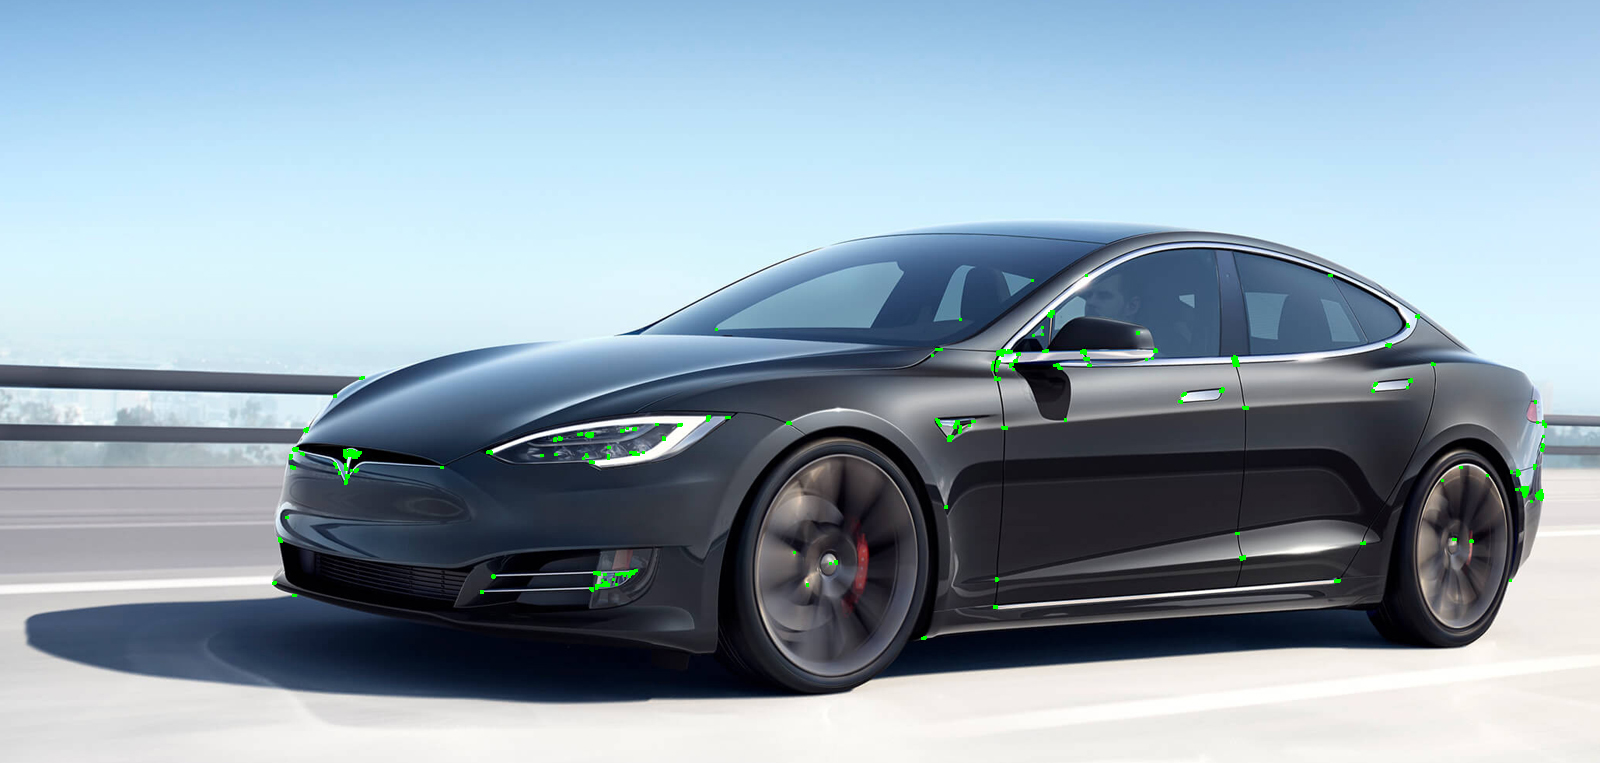

-1

In [ ]:
import cv2
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow

img = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/scene.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

dst = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 255, 0]

cv2_imshow(img)
cv2.waitKey()

## Detección de esquinas Shi-Tomasi
Shi y Tomasi idearon una función de puntuación diferente a la utilizada en el detector de esquinas de Haris para encontrar N esquinas más acentuadas a partir de una imagen.

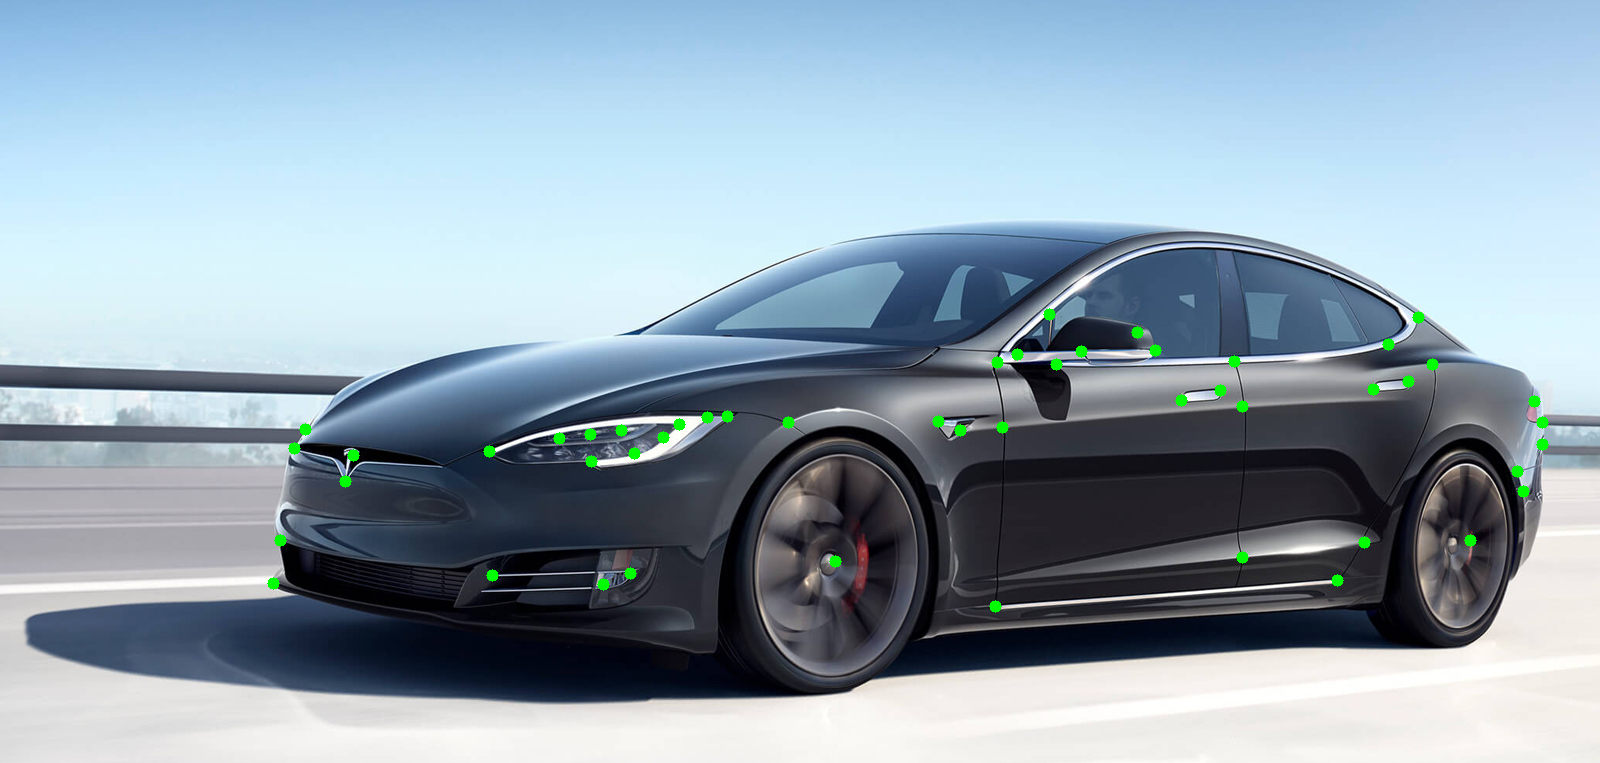

-1

In [ ]:
import cv2
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow

img = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/scene.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,      qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (x, y), 6, (0, 255, 0), -1)

cv2_imshow(img)
cv2.waitKey()

Las dos técnicas anteriores Haris Corner and Shi-Tomasi son invariantes en la rotación, lo que significa que incluso si se giran las esquinas, seremos capaces de detectarlas con exactitud. Sin embargo, son variantes a escala; si se amplían las esquinas perderemos la forma en la región seleccionada y los detectores no podrán identificarlas.

## SIFT
SIFT es invariante tanto en rotación como en escala. SIFT proporciona puntos clave y descriptores de puntos clave donde el descriptor de puntos clave describe el punto clave en una escala seleccionada y rotación con gradientes de imagen.
<br>
<br>
La imagen resultante tiene círculos que representan los puntos / características clave, donde el tamaño del círculo representa la fuerza del punto clave y la línea dentro del círculo denota la orientación del punto clave.

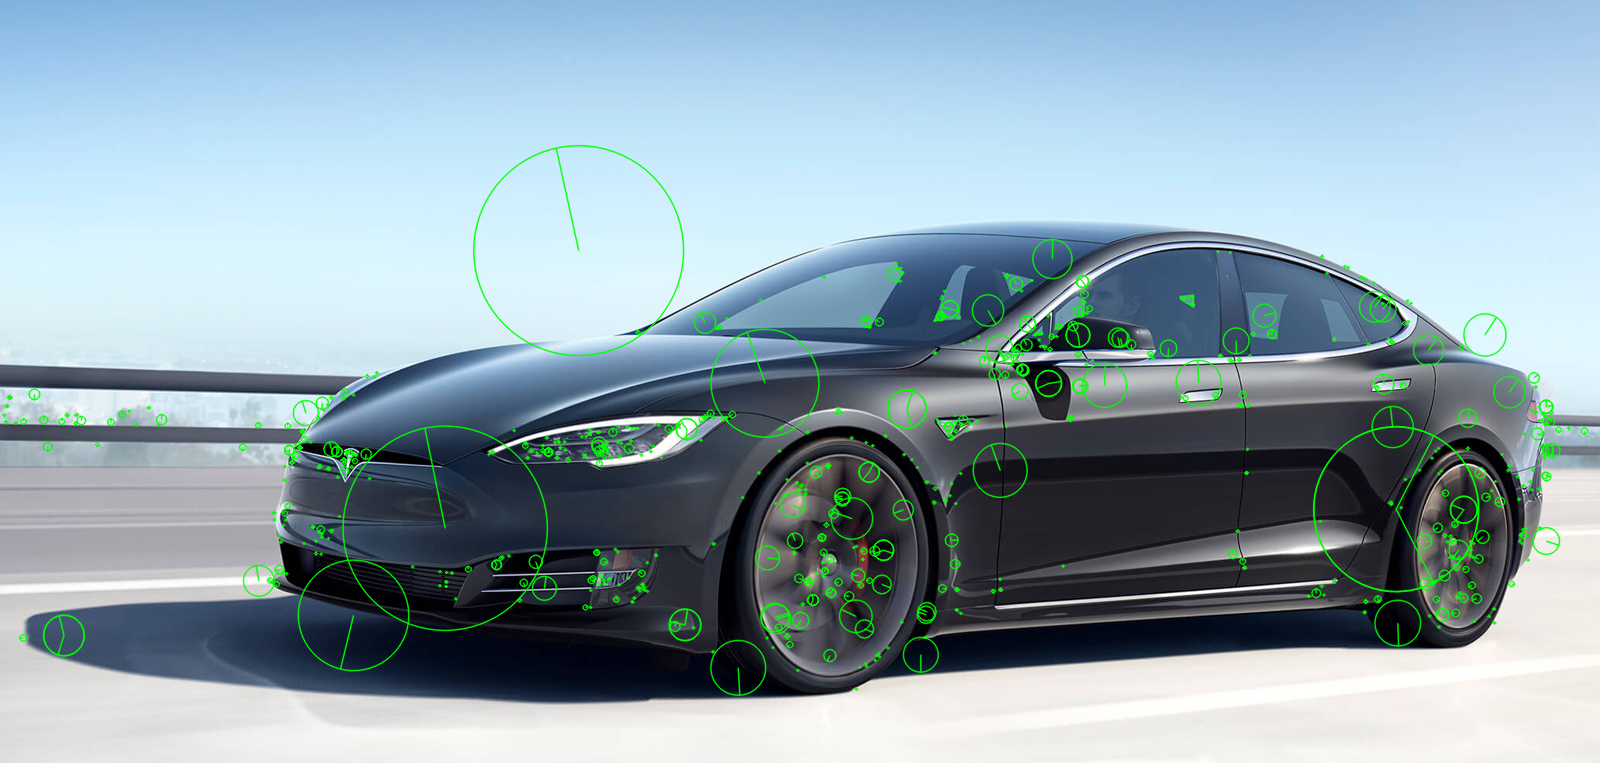

-1

In [ ]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

img = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/scene.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0),                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(kp_img)
cv2.waitKey()

## SURF (Funciones robustas aceleradas)
Aunque SIFT funciona bien, realiza operaciones intensivas que requieren mucho tiempo. SURF se introdujo para tener todas las ventajas de SIFT con un tiempo de procesamiento reducido.

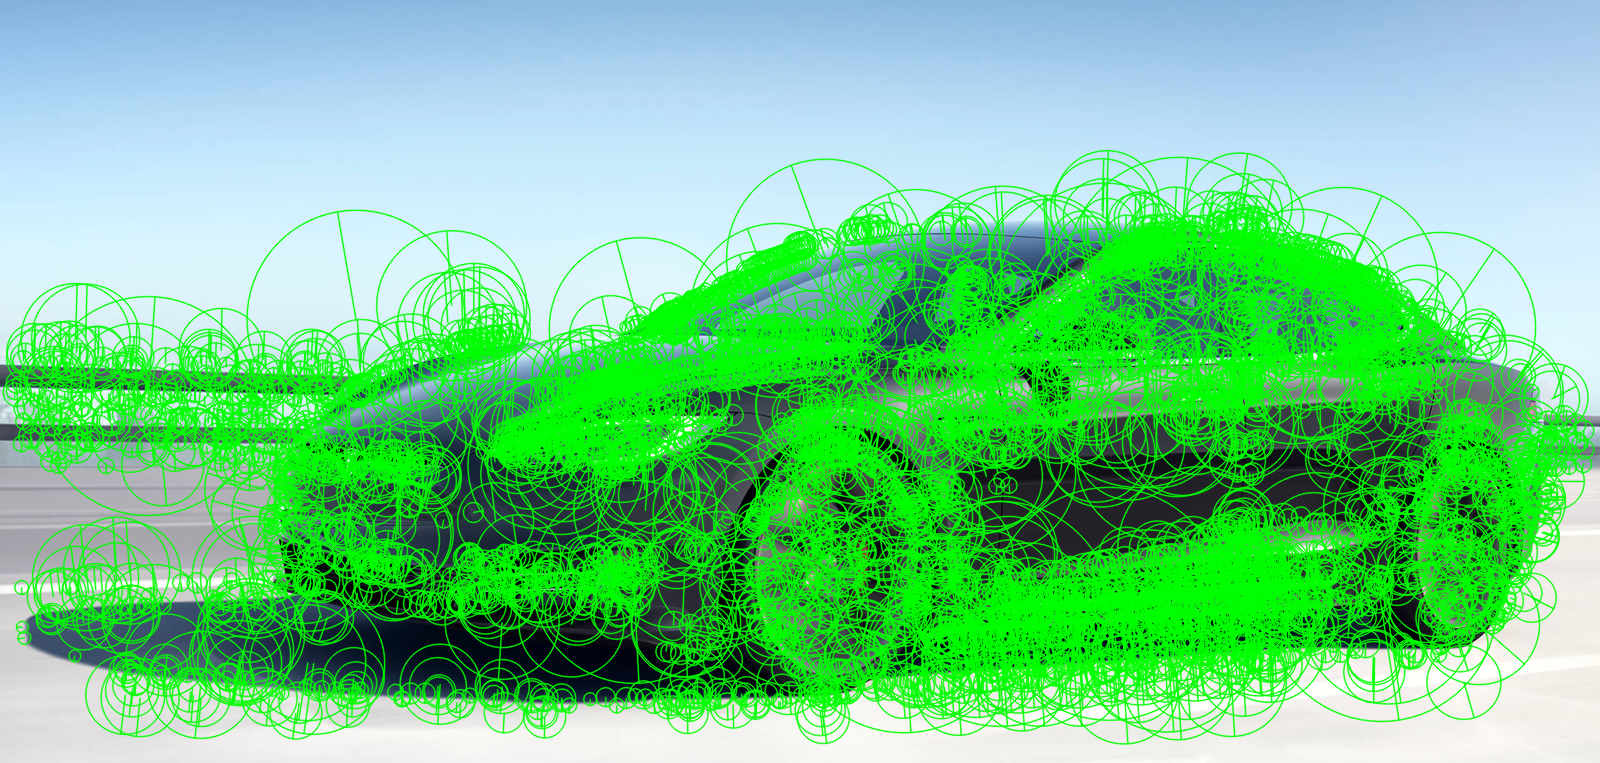

-1

In [ ]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

img = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/scene.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(kp_img)
cv2.waitKey()

## Algoritmo FAST para la detección de esquinas
SURF es rápido en comparación con SIFT, pero no tan rápido para usarlo con dispositivos en tiempo real como teléfonos móviles. Así que se introdujo el algoritmo FAST con un tiempo de procesamiento reducido. Sin embargo, FAST nos da solo los puntos clave y es posible que necesitemos calcular descriptores con otros algoritmos como SIFT y SURF.

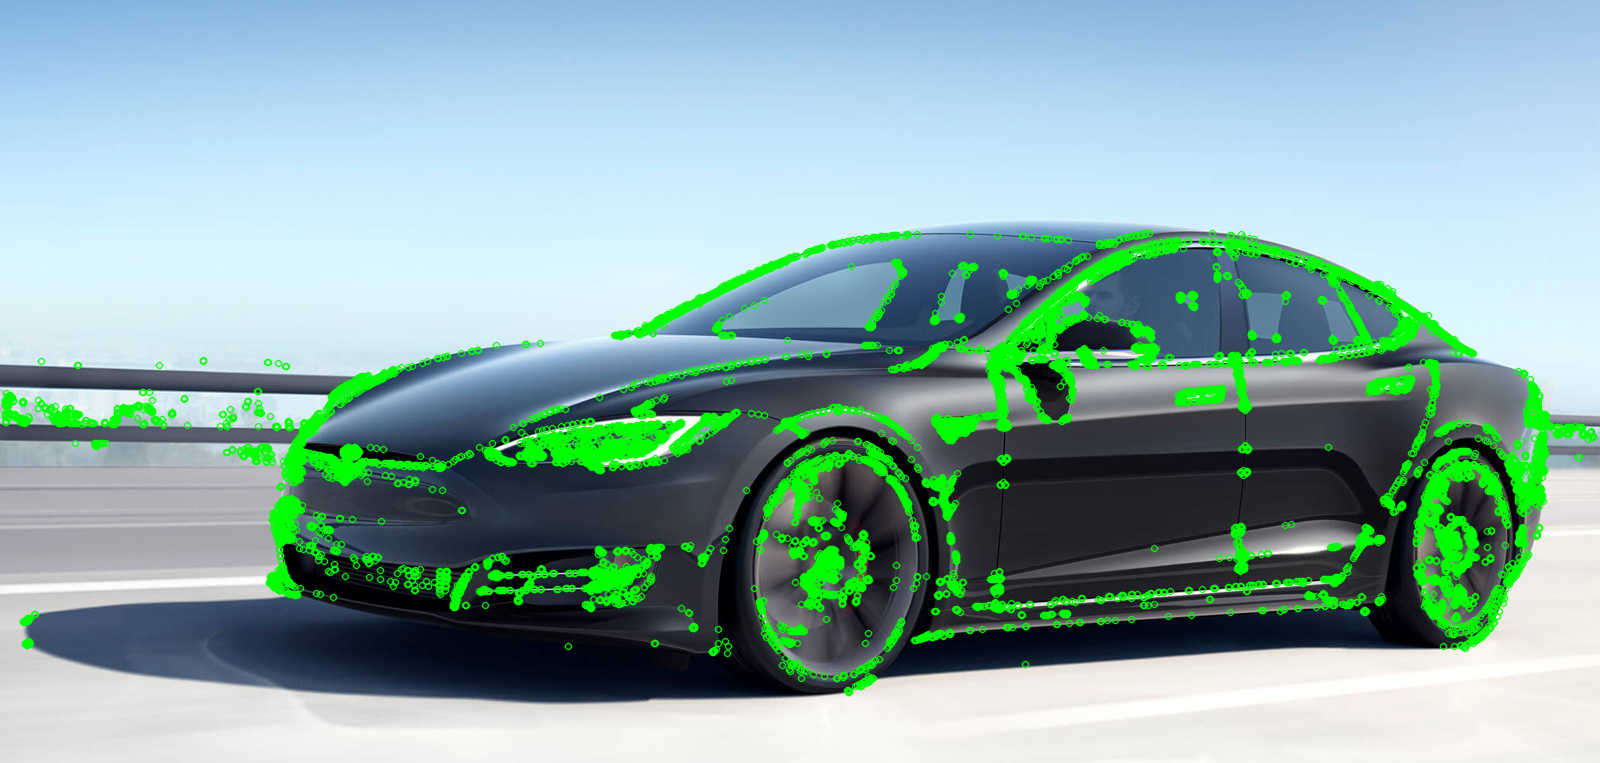

-1

In [ ]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

img = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/scene.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

cv2_imshow(kp_img)
cv2.waitKey()

## ORBE
ORB es una alternativa eficiente de código abierto a SIFT y SURF. A pesar de que calcula menos puntos clave en comparación con SIFT y SURF, son efectivos. Utiliza técnicas FAST y BRIEF para detectar los puntos clave y calcular los descriptores de imagen respectivamente.

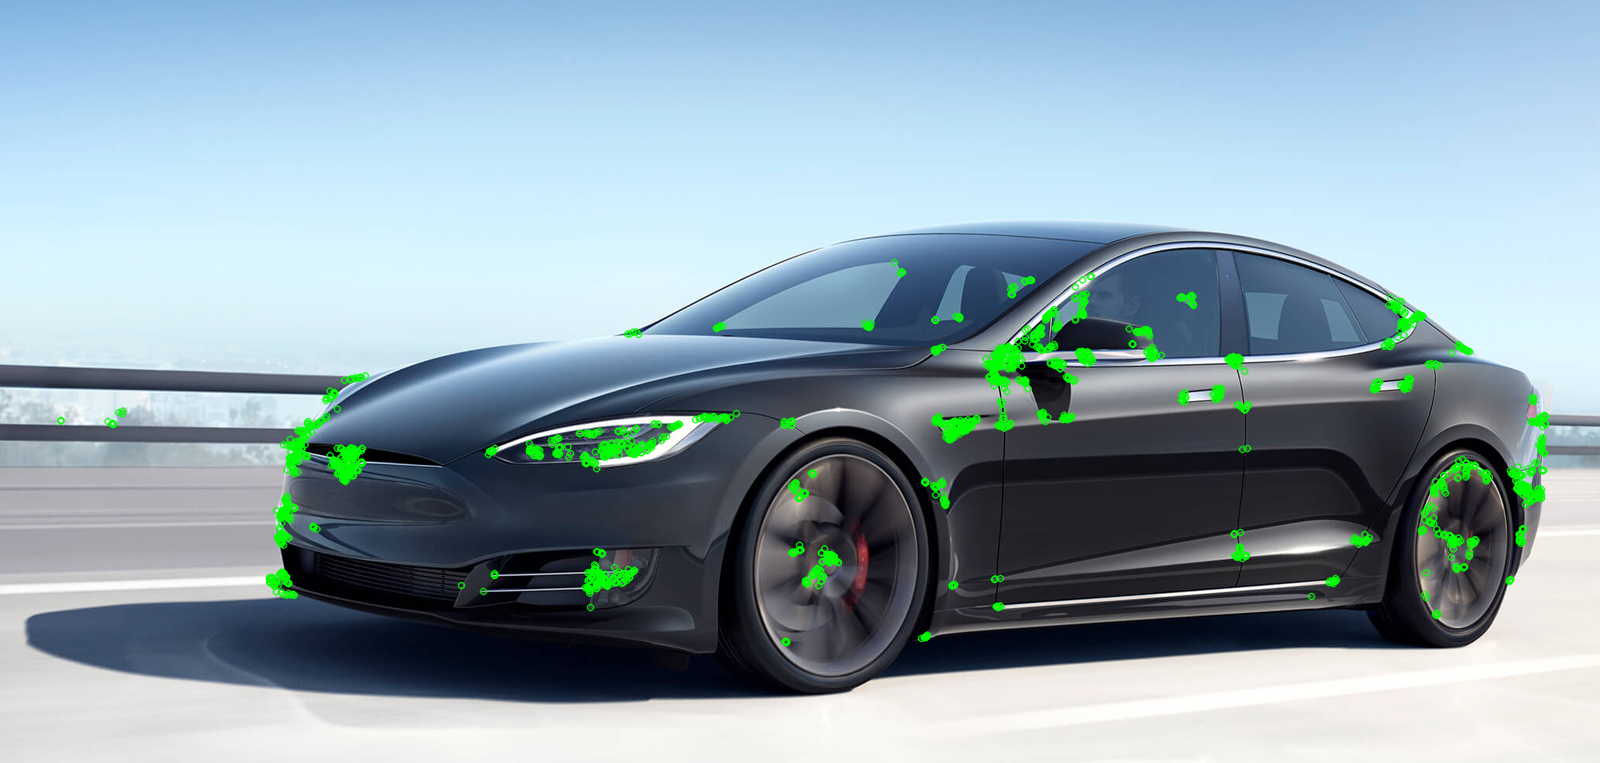

-1

In [ ]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

img = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/scene.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

cv2_imshow(kp_img)
cv2.waitKey()

## Apareamiento de características
La coincidencia de características entre imágenes en OpenCV se puede realizar con un comparador de fuerza bruta o un comparador basado en FLANN.
### Comparador de fuerza bruta (BF)
BF Matcher compara el descriptor de una característica de una imagen con todas las demás características de otra imagen y devuelve la coincidencia en función de la distancia. Es lento ya que verifica que coincida contra todas las caracterìsticas.

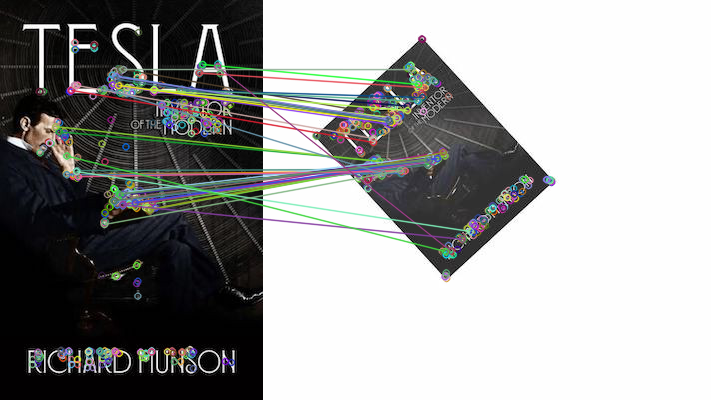

-1

In [ ]:
import cv2

from skimage import io
from google.colab.patches import cv2_imshow

img1 = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/book_cover.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = io.imread('https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/5-ImageFeatures/images/book_cover_rotated.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
cv2_imshow(match_img)
cv2.waitKey()

### FLANN based matcher
La biblioteca rápida para vecinos más cercanos aproximados (FLANN) está optimizada para encontrar las coincidencias con la búsqueda incluso con grandes conjuntos de datos, por lo que es rápida en comparación con el comparador de fuerza bruta.
<br>
Con ORB y FLANN matcher extraemos la portada del libro tesla de la segunda imagen y corrijamos la rotación con respecto a la primera imagen

In [ ]:
def get_corrected_img(img1, img2):
    MIN_MATCHES = 50

    orb = cv2.ORB_create(nfeatures=500)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        m, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
        corrected_img = cv2.warpPerspective(img1, m, (img2.shape[1], img2.shape[0]))

        return corrected_img
    return img2

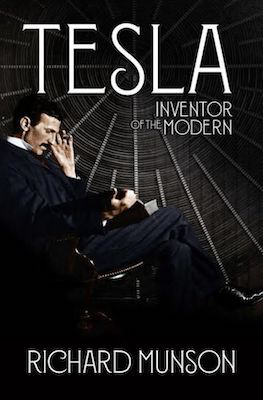

-1

In [ ]:
import argparse

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

im1 = img1
im2 = img2

img = get_corrected_img(im2, im1)
cv2_imshow(img)
cv2.waitKey()